# ------------------------------------------ BITCOIN PROJECT ---------------------------------------

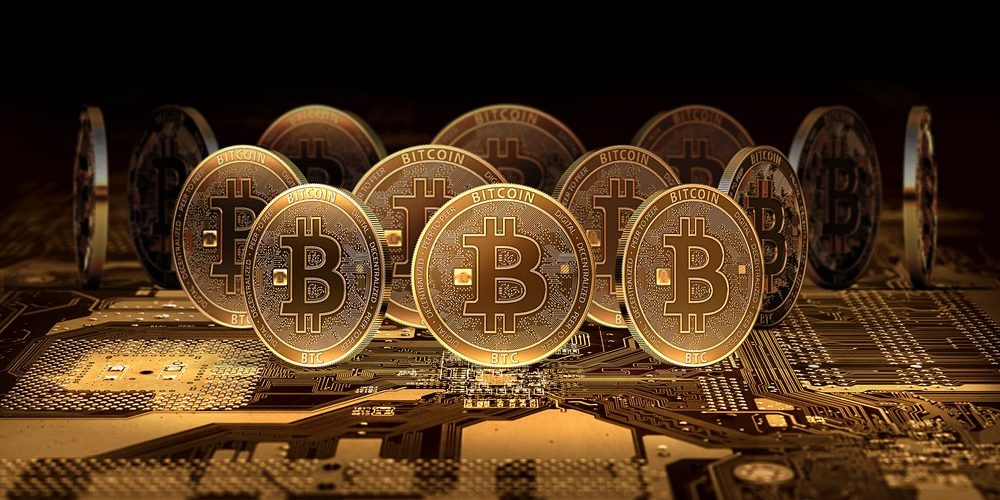

In [1]:
from IPython.display import Image
Image(filename='bitcoin_img.jpg') 

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # for data exploration
%matplotlib inline
import seaborn as sns  #for Data Visualization
import datetime as dt

# for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#for data modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Importing the Bitcoin dataset

In [3]:
df = pd.read_csv("C:/Users/Mehakdeep Kaur/Documents/IBM_Data-20200624T105554Z-001/Data/Bitcoin.csv")

In [4]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1417412280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1417412340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1417412520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


In [6]:
# Since Timestamp is an integer datatype, we convert it into date-time object

pd.to_datetime(df["Timestamp"], unit="s").head()
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit = "s")

In [7]:
# Setting the timestamp column as the index of the bitcoin dataset
df.set_index('Timestamp', inplace = True)

In [8]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Explanation

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary.

Following is the description of the columns oncluded in this dataset.
###### Timestamp  :-
Start time of time window (60s window)

###### Open :-
Opening price at the start of a time window

###### High :-
Highest price within a time window

###### Low :-
Lowest price within a time window

###### Close :-
Closing price at the end of a time window

###### Volume(BTC) :-
Amount of currency transacted in a time window

###### Volume_(Currency) :-
Amount of currency (in USD) transacted in a window 

###### Weighted_Price :-
Volume-weighted average price


## Data Cleaning

In [9]:
# To avoid errors caused due to the parentheses in the names of the columns, we rename them 
df.rename(columns = {"Volume_(BTC)":"Volume_BTC", "Volume_(Currency)":"Volume_Currency"}, inplace=True)
df.head()

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Treatment of Null Values

In [10]:
# No. of Missing values per column
df.isnull().sum()

Open               109069
High               109069
Low                109069
Close              109069
Volume_BTC         109069
Volume_Currency    109069
Weighted_Price     109069
dtype: int64

In [11]:
# Percentage of missing values per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,
                               'percent_missing': percent_missing})
missing_values

,column_name,percent_missing
Open,Open,5.194356
High,High,5.194356
Low,Low,5.194356
Close,Close,5.194356
Volume_BTC,Volume_BTC,5.194356
Volume_Currency,Volume_Currency,5.194356
Weighted_Price,Weighted_Price,5.194356


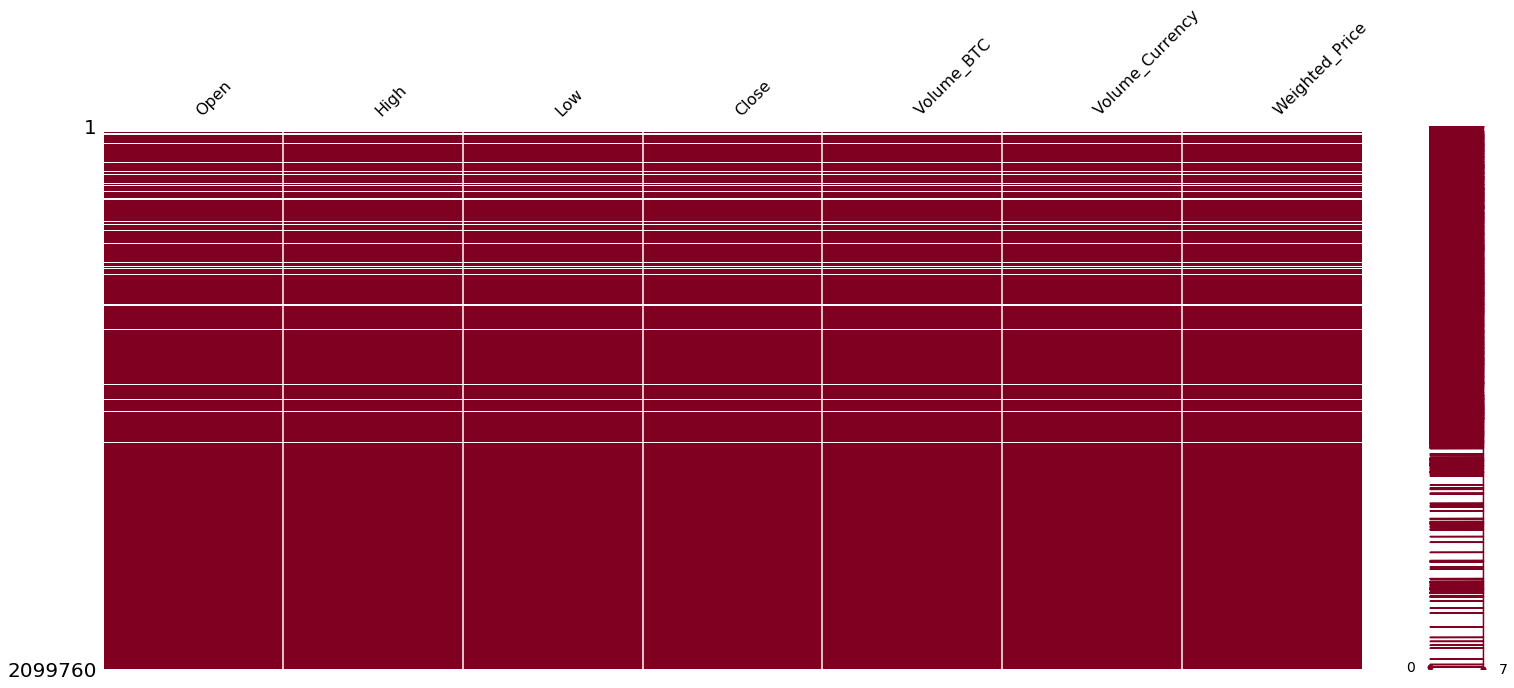

In [12]:
# Importing missingno library to visualize the missing values

import missingno as msno
msno.matrix(df, color=(0.5,0,0.13))

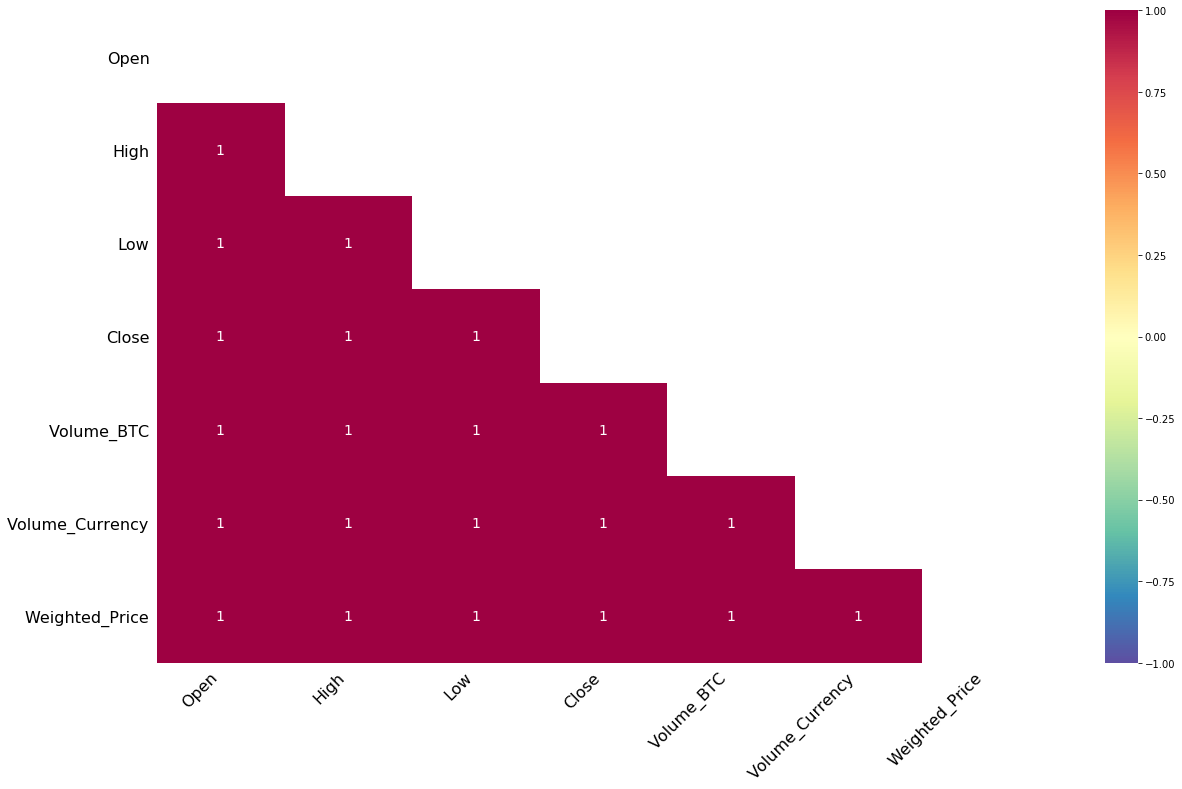

In [13]:
# Heatmap of missing values
msno.heatmap(df, cmap='Spectral_r')

From the above visualizations, we can conclude that the missing values in all the columns occur at the same indices. 

The missing values, here, in the dataset represent the 'Timestamps' without any trades or activity, and thus have their fields filled by NaN values.

Also, the missing values constitute only 5.194356 % of the dataset. So, the indices containing the missing values can be dropped. 

In [14]:
# Since the null values in a particular time stamp window means no transaction took place, we drop all the null values
# Dropping all the NaN values

df1 = df.dropna()
df1.head(20)

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 05:40:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 06:24:00,370.00,370.00,370.00,370.00,0.010000,3.700000,370.000000
2014-12-01 06:50:00,370.00,370.00,370.00,370.00,0.026556,9.825550,370.000000
2014-12-02 05:29:00,377.00,377.00,377.00,377.00,0.010000,3.770000,377.000000
2014-12-02 10:59:00,377.75,378.00,377.75,378.00,4.000000,1511.937500,377.984375
2014-12-02 11:04:00,378.00,378.00,378.00,378.00,4.900000,1852.200000,378.000000
2014-12-02 11:05:00,378.00,378.00,378.00,378.00,5.200000,1965.600000,378.000000
2014-12-02 18:43:00,378.00,378.00,378.00,378.00,0.100000,37.800000,378.000000


In [15]:
df1.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

In [16]:
# Dimensions of dataset after dropping the missing value indices
df1.shape

(1990691, 7)

## Data Visualization

### Pairwise correlation of columns

In [17]:
df1.corr()

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Open,1.000000,0.999998,0.999998,0.999997,0.147888,0.399696,0.999999
High,0.999998,1.000000,0.999996,0.999998,0.148487,0.400542,0.999999
Low,0.999998,0.999996,1.000000,0.999998,0.147208,0.398760,0.999999
Close,0.999997,0.999998,0.999998,1.000000,0.147858,0.399670,0.999999
Volume_BTC,0.147888,0.148487,0.147208,0.147858,1.000000,0.710127,0.147834
Volume_Currency,0.399696,0.400542,0.398760,0.399670,0.710127,1.000000,0.399635
Weighted_Price,0.999999,0.999999,0.999999,0.999999,0.147834,0.399635,1.000000


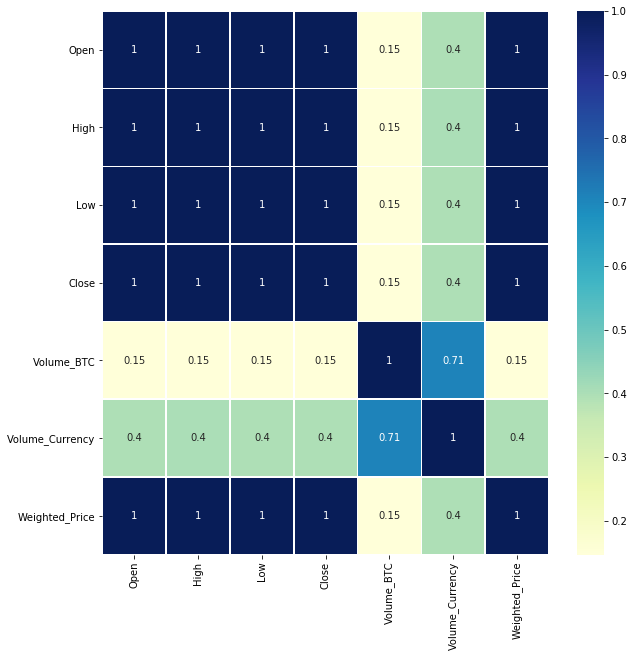

In [18]:
# Visualization of the correlation of columns using heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True, linewidths = 0.5 )

### How the volume of currency transactions vary with respect to the volume of bitcoin exchanges

Text(0.5, 1.0, 'BTC-Currency Scatter Plot')

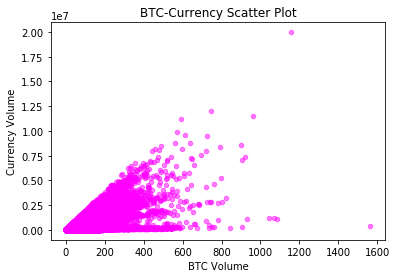

In [19]:
df1.plot(kind='scatter', x='Volume_BTC', y='Volume_Currency',alpha = 0.5,color = 'magenta')
plt.xlabel('BTC Volume')              # label = name of label
plt.ylabel('Currency Volume')
plt.title('BTC-Currency Scatter Plot')            # title = title of plot

### Variation between Opening and Closing prices in a time window

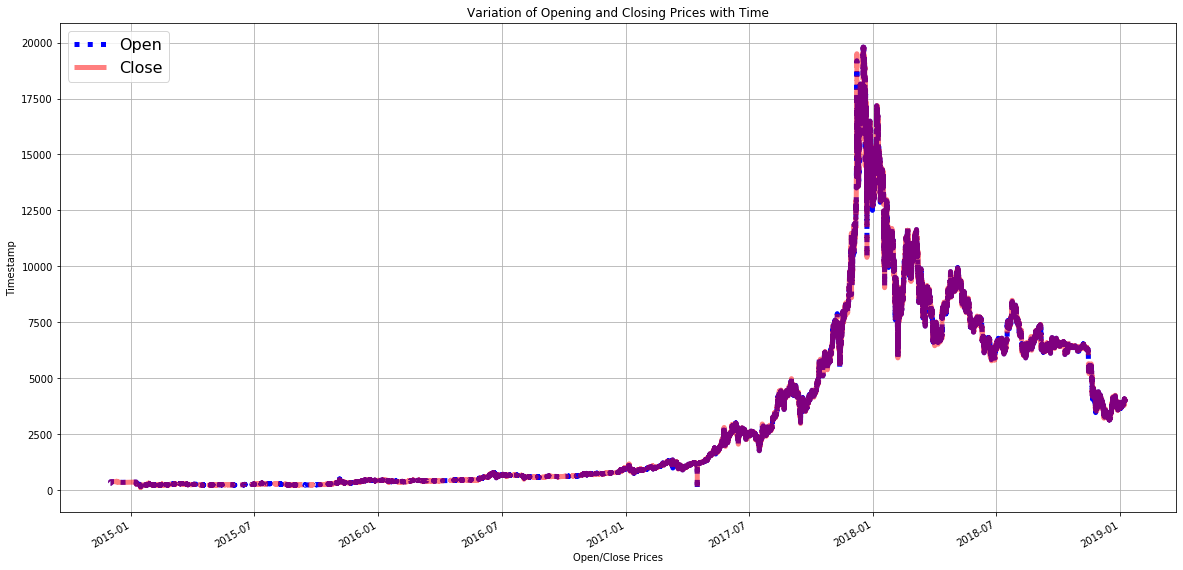

In [20]:
plt.subplots(figsize=(20, 10))
df1.Open.plot(kind = 'line', color = 'b',label = 'Open',linewidth=5,alpha = 1,grid = True,linestyle = ':')
df1.Close.plot(kind='line',color = 'r',label = 'Close',linewidth=5, alpha = 0.5,grid = True,linestyle = '-.')

plt.legend(loc='upper left', fontsize = 16)     
plt.xlabel('Open/Close Prices')              
plt.ylabel('Timestamp')
plt.title('Variation of Opening and Closing Prices with Time')            
plt.show()

### Variation of Bitcoin exchanges with time

In [21]:
# Resampling to daily frequency
df1 = df1.resample('D').mean()

# Resampling to monthly frequency
df1_month = df1.resample('M').mean()

# Resampling to annual frequency
df1_year = df1.resample('A-DEC').mean()


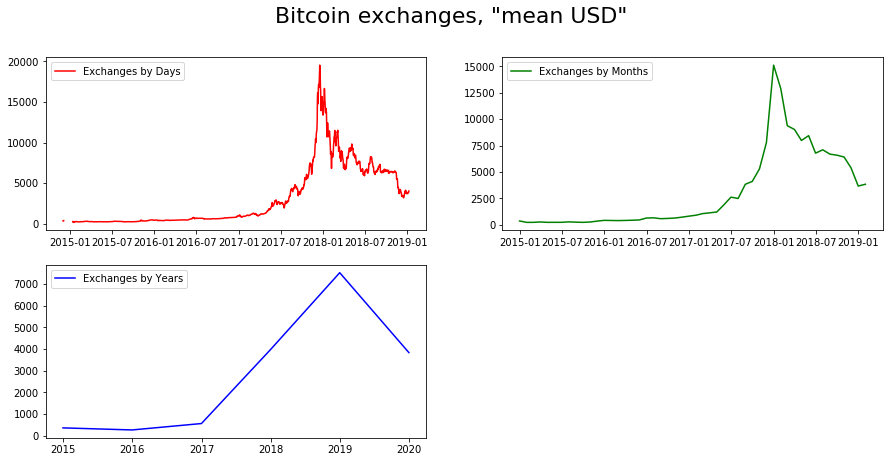

In [22]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, "mean USD"', fontsize=22)

plt.subplot(2, 2, 1)
plt.plot(df1.Weighted_Price, '-', color='r',label='Exchanges by Days')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df1_month.Weighted_Price, 'g', label='Exchanges by Months')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df1_year.Weighted_Price, 'b', label='Exchanges by Years')
plt.legend()



In [23]:
df1 = df.dropna()
df1.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

## Problem: 

Predicting the value of Closing Prices when the other features of the Bitcoin Dataset are known.

## Data preprocessing

### Splitting the dataset into the Training set and Test set

In [24]:
# x contains the columns 'Open', 'High', 'Low', 'Volume_BTC', 'Volume_Currency', 'Weighted_Price'
# y contains the variable to be predicted i.e. the closing prices 'Close'

x = df1.iloc[:,[0, 1, 2, 4, 5, 6]]
y = df1.iloc[:,[3]]

In [25]:
# Splitting of the dataset into train and test in the ratio 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [26]:
x_train.head()


,Open,High,Low,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,,
2015-09-23 11:22:00,229.93,229.94,229.93,8.472400,1948.061072,229.930253
2018-09-22 14:11:00,6684.80,6684.80,6674.00,11.074193,74024.016006,6684.371175
2015-12-13 07:20:00,433.59,433.99,433.24,12.611058,5468.761666,433.648113
2016-07-12 15:57:00,660.99,660.99,660.98,11.430000,7555.115570,660.989989
2016-12-28 23:54:00,982.03,982.03,982.00,10.648380,10456.760636,982.004834


In [27]:
y_train.head()

,Close
Timestamp,
2015-09-23 11:22:00,229.94
2018-09-22 14:11:00,6674.01
2015-12-13 07:20:00,433.24
2016-07-12 15:57:00,660.98
2016-12-28 23:54:00,982.00


In [28]:
x_train.isnull().sum()

Open               0
High               0
Low                0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

## Data Modelling

### Training the Linear Regression Model on training dataset

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_test

,Close
Timestamp,
2015-02-16 13:50:00,234.24
2015-11-10 18:39:00,352.79
2017-07-30 18:14:00,2706.99
2016-06-30 00:01:00,639.42
2015-04-18 22:32:00,223.83
...,...
2016-11-06 14:22:00,711.14
2016-03-29 21:13:00,414.78
2017-01-10 14:26:00,906.65


In [32]:
lm.score(x_test, y_test)

0.9999992274017501

In [33]:
# Intercept of the regression line

lm.intercept_


array([0.01224274])

In [34]:
# Coefficients for the multiple regression model

lm.coef_

array([[-5.63767704e-01,  6.79250309e-01,  6.32283897e-01,
         1.34016301e-03, -2.03548965e-08,  2.52233801e-01]])

### Predicting the test results

In [35]:
# We got 99% accuracy on our test data also..that means our model is quite good
#now we can test for actual predictions!!

#we will take some data from test set and try to predict that

#we will take row number 900 from our original dataset, i.e from one before splitting
y_pred = lm.predict(x_test)
y_pred

array([[ 234.14011754],
       [ 352.92217328],
       [2706.62947927],
       ...,
       [ 906.49724966],
       [3788.71324282],
       [ 233.34372246]])

In [36]:
sample_data = df1.iloc[900]
sample_data

Open               157.6300
High               157.6300
Low                157.6300
Close              157.6300
Volume_BTC           0.0100
Volume_Currency      1.5763
Weighted_Price     157.6300
Name: 2015-01-14 16:03:00, dtype: float64

In [37]:
sample = [[157.6300, 157.6300, 157.6300, 0.0100, 1.5763, 157.6300]]
lm.predict(sample)

array([[157.64230389]])

The actual closing price is 157.6300.
The closing price predicted by the Linear Regression model is 157.6437237.
Both the values are quite similar. Thus, we can say that Linear Regression Model prevides a good fit.

In [38]:
df1.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

### Checking the score with adjusted R2

In [39]:
# We can check the accuracy using adjusted R-square method as well.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9999992274017501

Thus, the Linear Regression Model perfectly fits in the given dataset to predict the Closing price of a particular time window.